In [22]:
#pip install pandas scikit-learn matplotlib

In [24]:
#Importing all the needed libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [26]:
#Load datasets
train_df = pd.read_csv("spam_messages_train.csv")
test_df = pd.read_csv("spam_messages_test.csv")

#Split features and labels
x_train_text = train_df["text"]
y_train = train_df["label"]

x_test_text = test_df["text"]
y_test = test_df["label"]

In [27]:
#TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words="english")
x_train = vectorizer.fit_transform(x_train_text)
x_test = vectorizer.transform(x_test_text)

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.94      0.97      0.96      3595
        spam       0.95      0.91      0.93      2331

    accuracy                           0.95      5926
   macro avg       0.95      0.94      0.94      5926
weighted avg       0.95      0.95      0.95      5926

Sample Prediction (Naïve Bayes): ['ham']


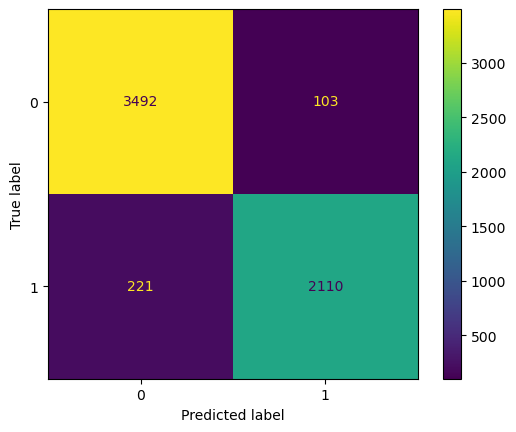

In [29]:
#Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

nb_predictions = nb_model.predict(x_test)

print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))


# Naive Bayes sample prediction
sample_message = ["Hello I am Ram. I was your friend back in school"]
sample_vector = vectorizer.transform(sample_message)

print("Sample Prediction (Naïve Bayes):", nb_model.predict(sample_vector))


# Naive Bayes confusion matrix
nb_cm = confusion_matrix(y_test, nb_predictions)
ConfusionMatrixDisplay(confusion_matrix=nb_cm).plot()
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         ham       0.95      0.96      0.96      3595
        spam       0.94      0.93      0.94      2331

    accuracy                           0.95      5926
   macro avg       0.95      0.95      0.95      5926
weighted avg       0.95      0.95      0.95      5926

Sample Prediction (Logistic Regression): ['ham']


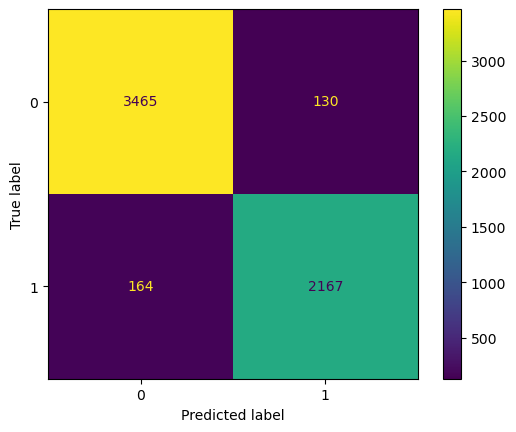

In [30]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

lr_predictions = lr_model.predict(x_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


#Logistic Regression sample prediction
print("Sample Prediction (Logistic Regression):", lr_model.predict(sample_vector))


#Logistic Regression confusion matrix
lr_cm = confusion_matrix(y_test, lr_predictions)
ConfusionMatrixDisplay(confusion_matrix=lr_cm).plot()
plt.show()

In [36]:
#Prediction on New Message
def predict_message(message, model, vectorizer):
    #Transform unseen message using trained TF-IDF vectorizer
    message_vector = vectorizer.transform([message])
    #Predict spam or ham
    return model.predict(message_vector)[0]


sample_message = "Don’t forget about the assignment submission tomorrow."

print("Naïve Bayes Prediction:",
      predict_message(sample_message, nb_model, vectorizer))

print("Logistic Regression Prediction:",
      predict_message(sample_message, lr_model, vectorizer))

Naïve Bayes Prediction: ham
Logistic Regression Prediction: ham
